In [7]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[['Age','Income($)']])

In [10]:
agg = AgglomerativeClustering(n_clusters=2) 

y_predicted_agg = agg.fit_predict(df[['Age','Income($)']])

In [11]:
df['Agglomerative_Cluster'] = y_predicted_agg
df

,Name,Age,Income($),Agglomerative_Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


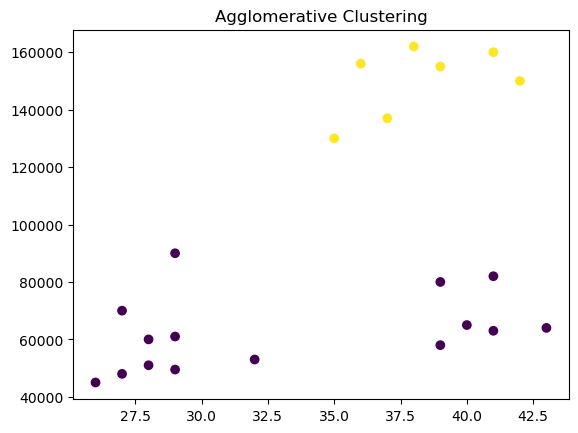

In [12]:
# Plot result
plt.scatter(df['Age'], df['Income($)'], c=df['Agglomerative_Cluster'], cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()

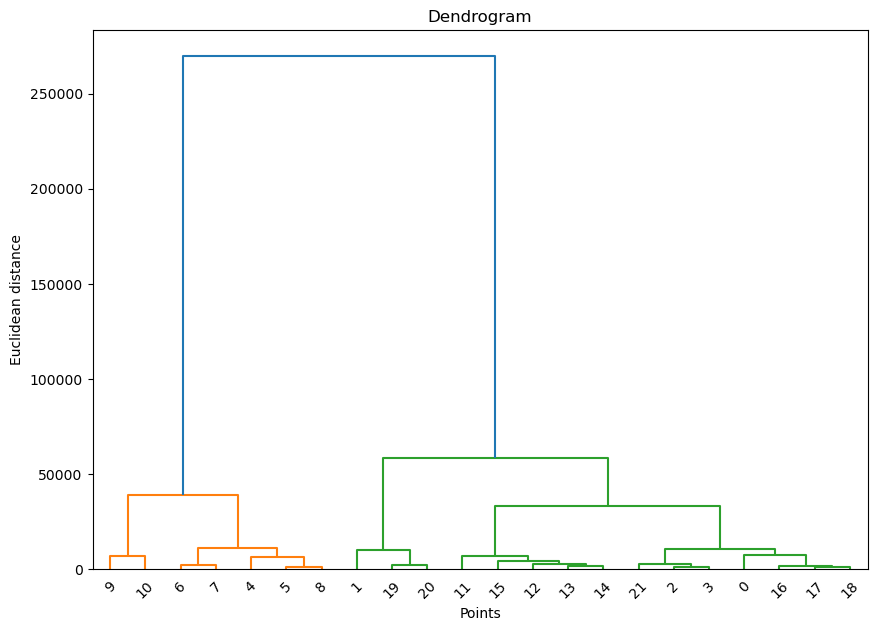

In [13]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df[['Age','Income($)']], method='ward'))
plt.title("Dendrogram")
plt.xlabel("Points")
plt.ylabel("Euclidean distance")
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df[['Age','Income($)']], y_predicted_agg)

In [15]:
score

0.8191238627089519

# Multiple  Dimmisions

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=300, centers=3, n_features=5, cluster_std=1.0, random_state=42)
df = pd.DataFrame(X, columns=['Age', 'Income', 'Spending', 'Education', 'Savings'])
df

,Age,Income,Spending,Education,Savings
0,-3.245610,9.593791,4.092599,0.745116,-4.505485
1,-3.132675,7.506133,5.739526,1.795438,-7.290010
2,-4.724870,-8.166070,6.700668,1.604157,2.873004
3,-10.677903,11.029323,5.877224,-5.456589,-5.358358
4,-2.801150,6.359110,4.985397,1.577653,-7.168764
...,...,...,...,...,...
295,-10.580623,9.905955,6.702841,-7.555627,-7.010030
296,-6.522184,-8.445065,8.004968,1.442837,5.250462
297,-7.180470,-9.643115,6.317407,0.971388,2.227773
298,-7.432755,-7.874477,8.297080,3.408204,5.170055


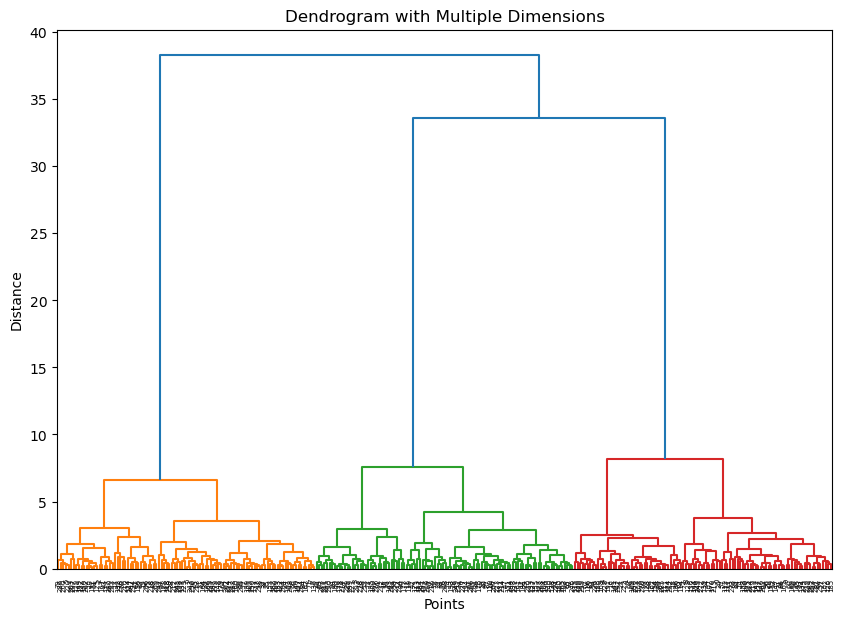

In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram with Multiple Dimensions")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
